In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

import uproot

import histlite as hl

import scipy.interpolate as interp

from scipy.optimize import curve_fit


plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

In [2]:
replayed_data_dir = '/p/lustre1/lenardo1/tunl_cs136_data/replayed/slurm_run30225/'

rootfiles = [filename for filename in os.listdir(replayed_data_dir) \
                                         if filename.endswith('.root')]

In [4]:
data_list = []

for thisfile in rootfiles:
    print('Opening {}'.format(thisfile))
    
    fullpath = replayed_data_dir + thisfile
    
    data_list.append( uproot.open(fullpath)['gamma_events'].arrays( ["*"], outputtype=pd.DataFrame ) )
    

Opening run30225_91.root
Opening run30225_33.root
Opening run30225_78.root
Opening run30225_49.root
Opening run30225_7.root
Opening run30225_60.root
Opening run30225_89.root
Opening run30225_107.root
Opening run30225_51.root
Opening run30225_95.root
Opening run30225_37.root
Opening run30225_132.root
Opening run30225_55.root
Opening run30225_3.root
Opening run30225_64.root
Opening run30225_103.root
Opening run30225_68.root
Opening run30225_23.root
Opening run30225_81.root
Opening run30225_12.root
Opening run30225_59.root
Opening run30225_117.root
Opening run30225_99.root
Opening run30225_70.root
Opening run30225_41.root
Opening run30225_126.root
Opening run30225_16.root
Opening run30225_27.root
Opening run30225_85.root
Opening run30225_45.root
Opening run30225_122.root
Opening run30225_113.root
Opening run30225_74.root
Opening run30225_22.root
Opening run30225_69.root
Opening run30225_80.root
Opening run30225_58.root
Opening run30225_13.root
Opening run30225_116.root
Opening run30225_98

In [5]:
data = pd.concat(data_list,ignore_index=True)

data.head()

,gamma_ch,gamma_PH,gamma_E,gamma_ts,gamma_tof,gamma_PSD,gamma_flash,gamma_true_time,gamma_t10,gamma_t25,gamma_t50,gamma_t90
0,30.0,21563.858333,0.0,8.585164e+11,3626.052653,8.0,0.0,3626.052653,109.0,185.0,293.0,458.0
1,27.0,241.441667,0.0,8.585164e+11,4266.563762,8.0,0.0,4266.563762,123.0,193.0,300.0,465.0
2,30.0,58.991667,0.0,8.585164e+11,6767.101848,8.0,0.0,6767.101848,8.0,108.0,123.0,250.0
3,27.0,1597.491667,0.0,8.585164e+11,7660.943522,8.0,0.0,7660.943522,73.0,83.0,107.0,187.0
4,27.0,72.033333,0.0,8.585164e+11,12045.343059,8.0,0.0,12045.343059,399.0,421.0,444.0,478.0


In [7]:
mask_pmt = data['gamma_ch'] == 30

data_pmt = data.loc[mask_pmt]

data_pmt.head()

data_pmt['Energy'] = 0.6219 * data_pmt['gamma_PH']



/g/g20/lenardo1/localpythonpackages/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


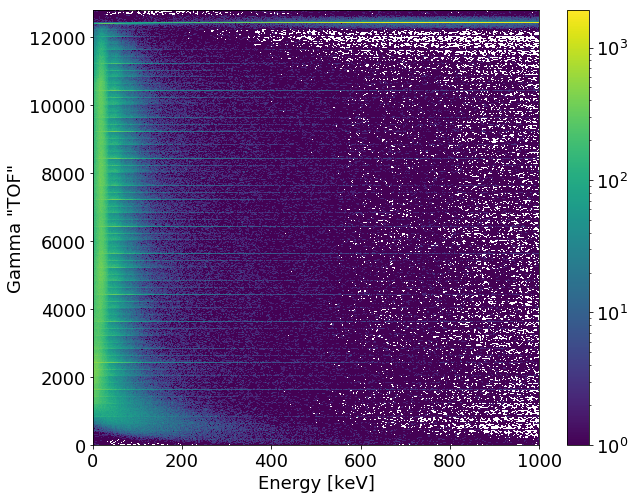

In [15]:
from matplotlib import colors

plt.hist2d( data_pmt['gamma_PH'] * 0.6219,\
                 data_pmt['gamma_tof'], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,12800,3200)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('Gamma \"TOF\"')
plt.xlim(0.,1000.)
plt.colorbar()


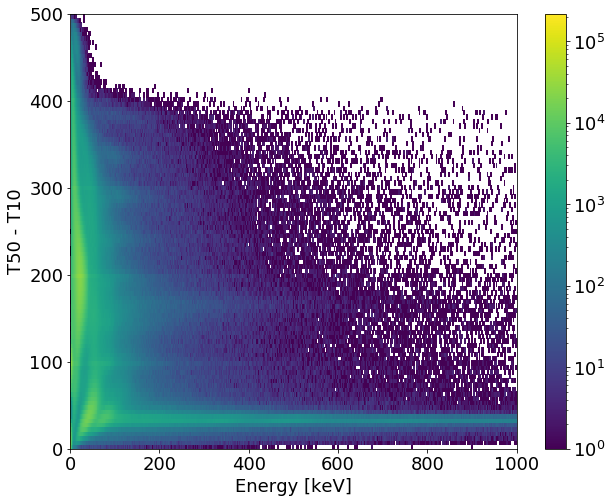

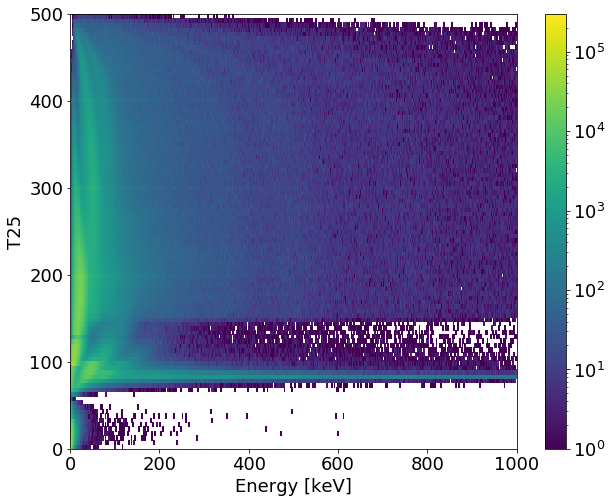

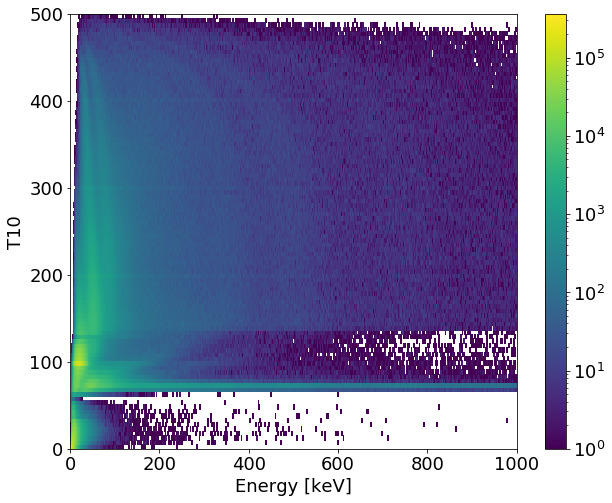

In [18]:
mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_t50'].loc[mask] - data_pmt['gamma_t10'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T50 - T10')
plt.xlim(0.,1000.)
plt.colorbar()

plt.figure(2)
#mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_t25'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T25')
plt.xlim(0.,1000.)
plt.colorbar()

plt.figure(3)
#mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_t10'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T10')
plt.xlim(0.,1000.)
plt.colorbar()


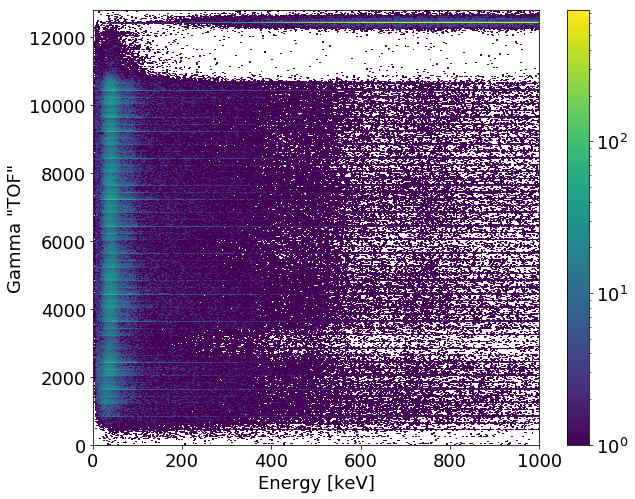

In [20]:
mask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_tof'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,12800,3200)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('Gamma \"TOF\"')
plt.xlim(0.,1000.)
plt.colorbar()

In [21]:
import pickle

datalist = []

for i in range(10):
    filename = replayed_data_dir + 'run30225_{}_nai_pmt_waveforms.pkl'.format(i)
    with open( filename ,'rb') as pklfile:
        datalist.extend(pickle.load(pklfile))
    
datadf = pd.DataFrame(datalist)



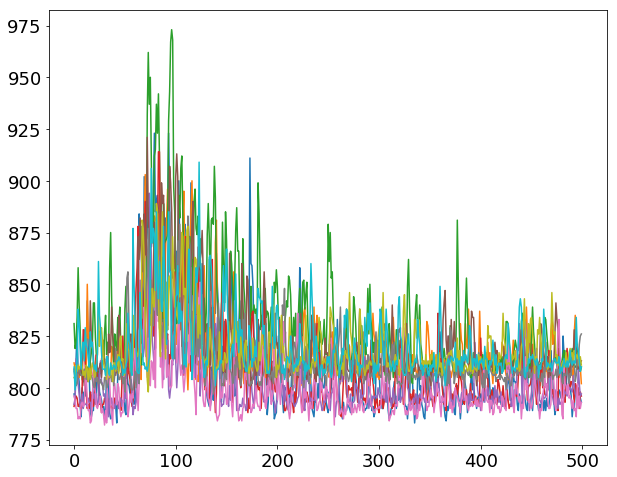

In [28]:
mask = (datadf['t25']>75.)&(datadf['t25']<100.)&\
        (datadf['t50'] - datadf['t10']>15)&\
        (datadf['t50'] - datadf['t10']<55)&\
        (datadf['peakhigh_reported']* 0.6219 < 100)

dfmask = datadf.loc[mask]

for i in range(10):
    plt.plot(dfmask['samples'].iloc[i])
